# 7.1 Neural Networks in One Dimension
* Introduction to Neural Network with **One Hidden Layer** with Two Neurons
*  Create a Neural Networks with One Hidden Layer using nn.Module
* Create a Neural Networks with One Hidden Layer using nn.Sequential

In [1]:
import torch
import torch.nn as nn
from torch import sigmoid

In [4]:
class Net(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)
  
  def forward(self, x):
    hidden = sigmoid(self.linear1(x))
    output = sigmoid(self.linear2(hidden))
    return output

In [8]:
model = Net(1,2,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.6202],
        [ 0.4605]], requires_grad=True), Parameter containing:
tensor([-0.4967,  0.9505], requires_grad=True), Parameter containing:
tensor([[0.1074, 0.4904]], requires_grad=True), Parameter containing:
tensor([-0.4002], requires_grad=True)]


In [11]:
model.state_dict()

OrderedDict([('linear1.weight', tensor([[-0.6202],
                      [ 0.4605]])),
             ('linear1.bias', tensor([-0.4967,  0.9505])),
             ('linear2.weight', tensor([[0.1074, 0.4904]])),
             ('linear2.bias', tensor([-0.4002]))])

In [9]:
x = torch.tensor([0.0]) # only one saminputple
yhat = model(x)
yhat

tensor([0.4985], grad_fn=<SigmoidBackward0>)

In [10]:
x = torch.tensor([[0.0], [2.0], [3.0]]) # three inputs
yhat = model(x)
yhat

tensor([[0.4985],
        [0.5102],
        [0.5140]], grad_fn=<SigmoidBackward0>)

## nn.Sequential을 이용한 모델 정의

In [16]:
model = nn.Sequential(nn.Linear(1,2),\
                      nn.Sigmoid(),\
                      nn.Linear(2,1),\
                      nn.Sigmoid())
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.3868],
        [-0.8515]], requires_grad=True), Parameter containing:
tensor([ 0.8748, -0.4254], requires_grad=True), Parameter containing:
tensor([[ 0.6851, -0.6876]], requires_grad=True), Parameter containing:
tensor([-0.4304], requires_grad=True)]


In [17]:
model.state_dict()

OrderedDict([('0.weight', tensor([[ 0.3868],
                      [-0.8515]])),
             ('0.bias', tensor([ 0.8748, -0.4254])),
             ('2.weight', tensor([[ 0.6851, -0.6876]])),
             ('2.bias', tensor([-0.4304]))])

In [18]:
x = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
y = torch.zeros(x.shape[0])
y[(x[:,0]>-4) & (x[:,0]<4) ] = 1.0

## 시각화와 함께 구현

In [20]:
# Import the libraries we need for this lab

import torch 
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

In [21]:
# The function for plotting the model

def PlotStuff(X, Y, model, epoch, leg=True):
    
    # 예측값 Plot
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    # 타겟값 Plot
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

In [22]:
# Define the class Net

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # Define the first linear layer as an attribute, this is not good practice
        self.a1 = None
        self.l1 = None
        self.l2=None
    
    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2=self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

In [23]:
# Define the training function

def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total=0
    for epoch in range(epochs):
        total=0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            #cumulative loss 
            total+=loss.item() 
        cost.append(total)
        if epoch % 300 == 0:    
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost

In [24]:
# Make some data

X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

In [25]:
# The loss function

def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

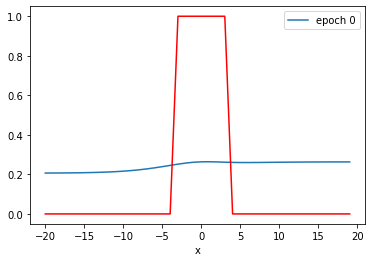

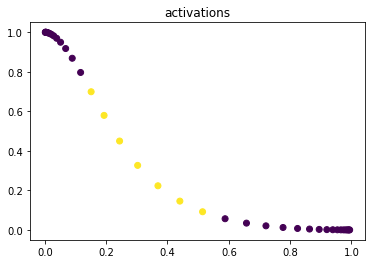

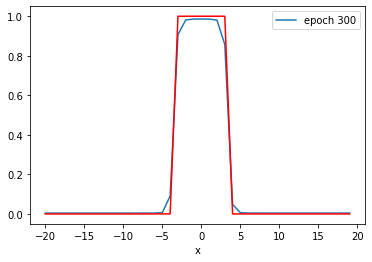

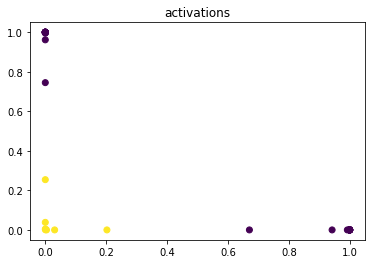

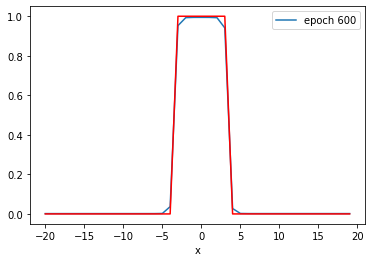

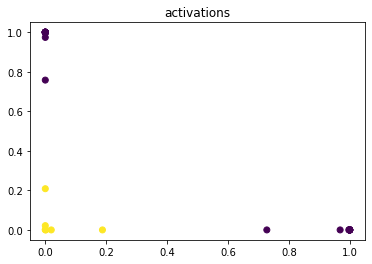

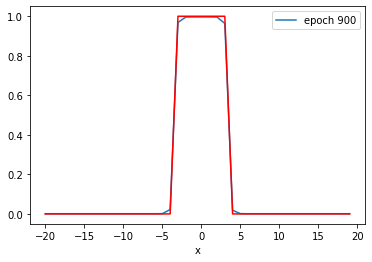

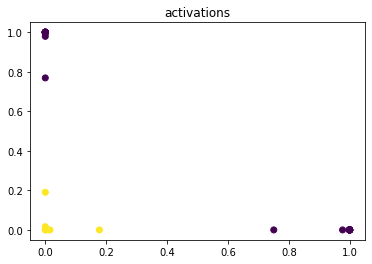

Text(0.5, 1.0, 'cross entropy loss')

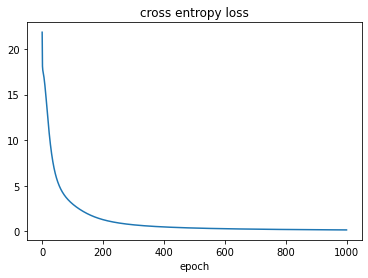

In [26]:
# Train the model
# size of input 
D_in = 1
# size of hidden layer 
H = 2
# number of outputs 
D_out = 1
# learning rate 
learning_rate = 0.1
# create the model 
model = Net(D_in, H, D_out)
#optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

# 7.2 More Hidden Neurons
*   How more Neurons in the Hidden Layer improve the Model
*   Create a Neural Networks with more Neurons in the hidden layer using nn.Modules and nn.Sequential

In [27]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [28]:
def get_hist(model, data_set):
  activations = model.activation(data_set.x)
  for i, activation in enumerate(activations):
    plt.hist(activation.numpy(), 4, density=True)
    plt.title('Activation Layer '+str(i+1))
    plt.xlabe('activation')
    plt.legend()
    plt.show()

In [37]:
def PlotStuff(X, Y, model=None, leg=False):
  plt.plot(X[Y==0].numpy(), Y[Y==0].numpy(), 'or', label='training points y=0')
  plt.plot(X[Y==1].numpy(), Y[Y==1].numpy(), 'ob', label='training points y=1')

  if model!=None:
    plt.plot(X.numpy(), model(X).detach().numpy(), label='neural network')
  
  plt.legend()
  plt.show()

## Construct Dataset

In [30]:
class Data(Dataset):
  def __init__(self):
    self.x = torch.linspace(-20, 20, 100).view(-1,1)
    self.y = torch.zeros(self.x.shape[0])

    self.y[(self.x[:,0]>-10)&(self.x[:,0]<-5)] = 1
    self.y[(self.x[:,0]>5) & (self.x[:,0]<10)] = 1

    self.y = self.y.view(-1,1)
    self.len = self.x.shape[0]
  
  def __getitem__(self, index):
    return self.x[index], self.y[index]
  
  def __len__(self):
    return self.len


## Define Network

In [32]:
class Net(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(Net,self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)
  
  def forward(self, x):
    hidden = torch.sigmoid(self.linear1(x))
    output = torch.sigmoid(self.linear2(hidden))
    return output

In [41]:
def train(dataset, model, criterion, train_loader, optimizer, epochs=5, plot_number=10):
  cost = []

  for epoch in range(epochs):
    total = 0

    for x, y in train_loader:
      optimizer.zero_grad()

      yhat = model(x)
      loss = criterion(yhat, y)
      loss.backward()
      optimizer.step()
      total+=loss.item() 

    if epoch%plot_number == 0:
      PlotStuff(dataset.x, dataset.y, model)

    cost.append(total)

  plt.figure()
  plt.plot(cost) 
  plt.xlabel('epoch')
  plt.ylabel('cost')
  plt.show()
  return cost


In [42]:
dataset = Data()
dataset

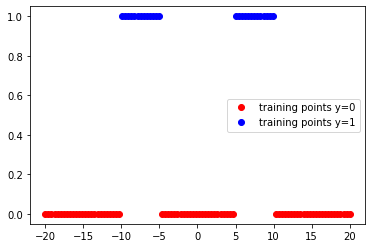

In [43]:
PlotStuff(dataset.x, dataset.y, leg=False)

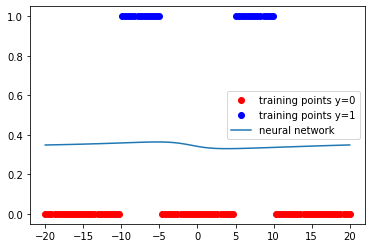

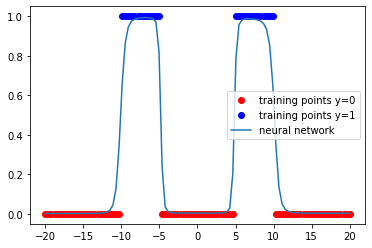

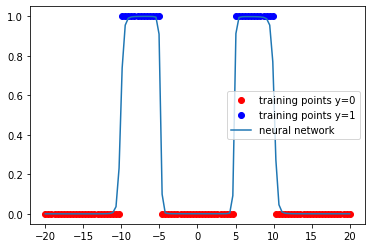

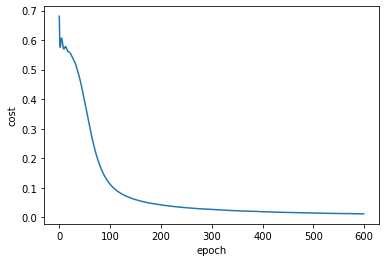

In [44]:
torch.manual_seed(0)
model = Net(1,9,1)
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=dataset, batch_size=100)
cost = train(dataset, model, criterion, train_loader, optimizer, epochs=600, plot_number=200)

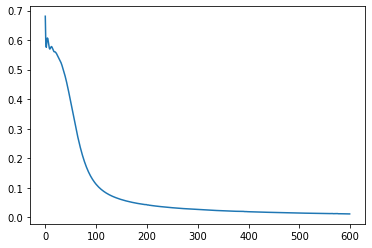

In [45]:
plt.plot(cost)

# 7.3 Nueral Networks with Multiple Dimensional Input
* Networks where the input is Multiple Dimensional
* Overfitting and Underfitting
>  * Overfitting : model is too complex for the data(too many neurons)
>  * Underfitting : model cannot capture the complexity of the data(too few neurons)
* Solution
>  * Use Validataion Data to determine optimum number of neurons
>  * Get more Data
>  * Regularization(ex. Dropout)


In [46]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

In [66]:
def plot_decision_regions_2class(model, dataset):
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
  cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])

  X = dataset.x.numpy()
  y = dataset.y.numpy()
  h = .02

  x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # ravel : 1차원의 벡터로 만들어 주는 것
  # np.c_ : 같은 column들을 묶어서 2차원 배열 만듦
  XX = torch.Tensor(np.c_[xx.ravel(), yy.ravel()]) # 참고 : https://rfriend.tistory.com/352  

  yhat = np.logical_not((model(XX)[:, 0] > 0.5).numpy()).reshape(xx.shape)
  plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
  plt.plot(X[y[:,0] == 0, 0], X[y[:, 0] == 0, 1], 'o', label='y=0')
  plt.plot(X[y[:,0] == 1, 0], X[y[:, 0] == 1, 1], 'ro', label='y=1')
  plt.title('decision region')
  plt.legend()

In [67]:
# Calculate the Accuracy
def get_accuracy(model, dataset):
  return np.mean(dataset.y.view(-1).numpy() == (model(dataset.x)[:, 0]>0.5).numpy())

In [68]:
# Build Model
class Net(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)

  def forward(self, x):
    hidden = torch.sigmoid(self.linear1(x))
    output = torch.sigmoid(self.linear2(hidden))
    return output

In [69]:
# Training Process
def train(dataset, model, criterion, train_loader, optimizer, epochs=5):
  cost = []
  acc = []
  for epoch in range(epochs):
    total = 0
    for x, y in train_loader:
      optimizer.zero_grad()
      yhat = model(x)
      loss = criterion(yhat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      total+=loss.item()

    acc.append(get_accuracy(model, dataset))
    cost.append(total)
  
  fig, ax1 = plt.subplots()
  color = 'tab:red'
  ax1.plot(cost, color=color)
  ax1.set_xlabel('epoch', color=color)
  ax1.set_ylabel('total loss', color=color)
  ax1.tick_params(axis='y', color=color)

  ax2 = ax1.twinx()
  color = 'tab:blue'
  ax2.set_ylabel('accuracy', color=color)
  ax2.plot(acc, color=color)
  ax2.tick_params(axis='y', color=color)

  plt.show()
  return cost

In [70]:
# Build Dataset
class XOR_Data(Dataset):
  def __init__(self, N_s=100):
    self.x = torch.zeros((N_s, 2))
    self.y = torch.zeros((N_s, 1))

    for i in range(N_s // 4):
      self.x[i, :] = torch.Tensor([0.0, 0.0])
      self.y[i, 0] = torch.Tensor([0.0])

      self.x[i+N_s//4, : ] = torch.Tensor([0.0, 1.0])
      self.y[i+N_s//4, 0] = torch.Tensor([1.0])
      
      self.x[i+N_s//2, : ] = torch.Tensor([1.0, 0.0])
      self.y[i+N_s//2, 0] = torch.Tensor([1.0])
      
      self.x[i+ 3*N_s//4, : ] = torch.Tensor([1.0, 1.0])
      self.y[i+3*N_s//4, 0] = torch.Tensor([0.0])

      self.x = self.x + 0.01 * torch.randn((N_s, 2))

    self.len = N_s

  def __getitem__(self, index):
    return self.x[index], self.y[index]
  
  def __len__(self):
    return self.len

  def plot_stuff(self):
    plt.plot(self.x[self.y[:,0] == 0, 0].numpy(), self.x[self.y[:,0]==0,1].numpy(), 'o', label='y=0')
    plt.plot(self.x[self.y[:,0] == 1, 0].numpy(), self.x[self.y[:,0]==1,1].numpy(), 'ro', label='y=1')
    plt.legend()

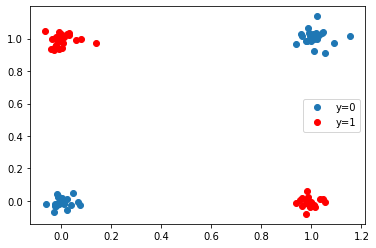

In [71]:
dataset = XOR_Data()
dataset.plot_stuff()

## One Hidden

In [72]:
model = Net(2,1,1)

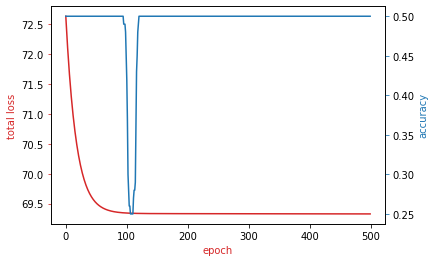

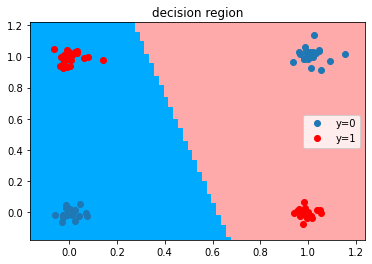

In [73]:
learning_rate = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=dataset, batch_size=1)
loss = train(dataset, model, criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model, dataset)

## Two Hidden

In [79]:
model = Net(2,2,1)

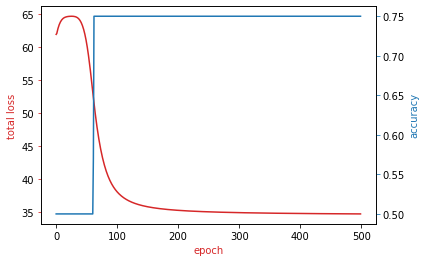

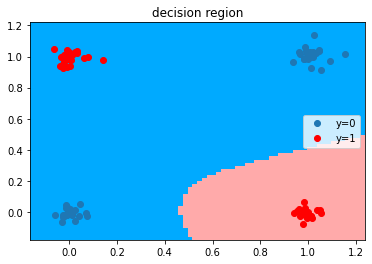

In [80]:
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=dataset, batch_size=1)
loss = train(dataset, model, criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model, dataset)

Three Hidden

In [81]:
model = Net(2,3,1)

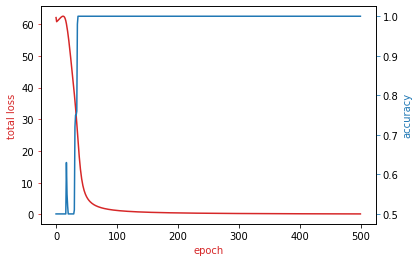

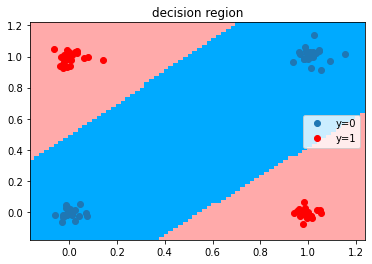

In [82]:
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=dataset, batch_size=1)
loss = train(dataset, model, criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model, dataset)